# Лабораторная работа №1
## Вариант 3 — Набор данных *Iris*

В этой работе мы выполним предварительный анализ данных и визуализацию для датасета **Iris**.

Задачи:
1. Загрузить данные и проверить наличие пропусков.
2. Вывести количество образцов каждого вида ириса.
3. Построить парные диаграммы рассеяния (pair plot).
4. Рассчитать средние значения признаков по видам.
5. Построить boxplot для `Petal Length`.
6. Выполнить стандартизацию данных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Загружаем CSV (обязательно должен лежать рядом в папке)
df = pd.read_csv('iris.csv')


# Первые 5 строк
df.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

### Проверка на пропуски

In [2]:
# Проверяем наличие пропусков
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

### Количество образцов каждого вида ириса

In [3]:
# Считаем количество образцов по видам
df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

### Парные диаграммы рассеяния (Pair Plot)

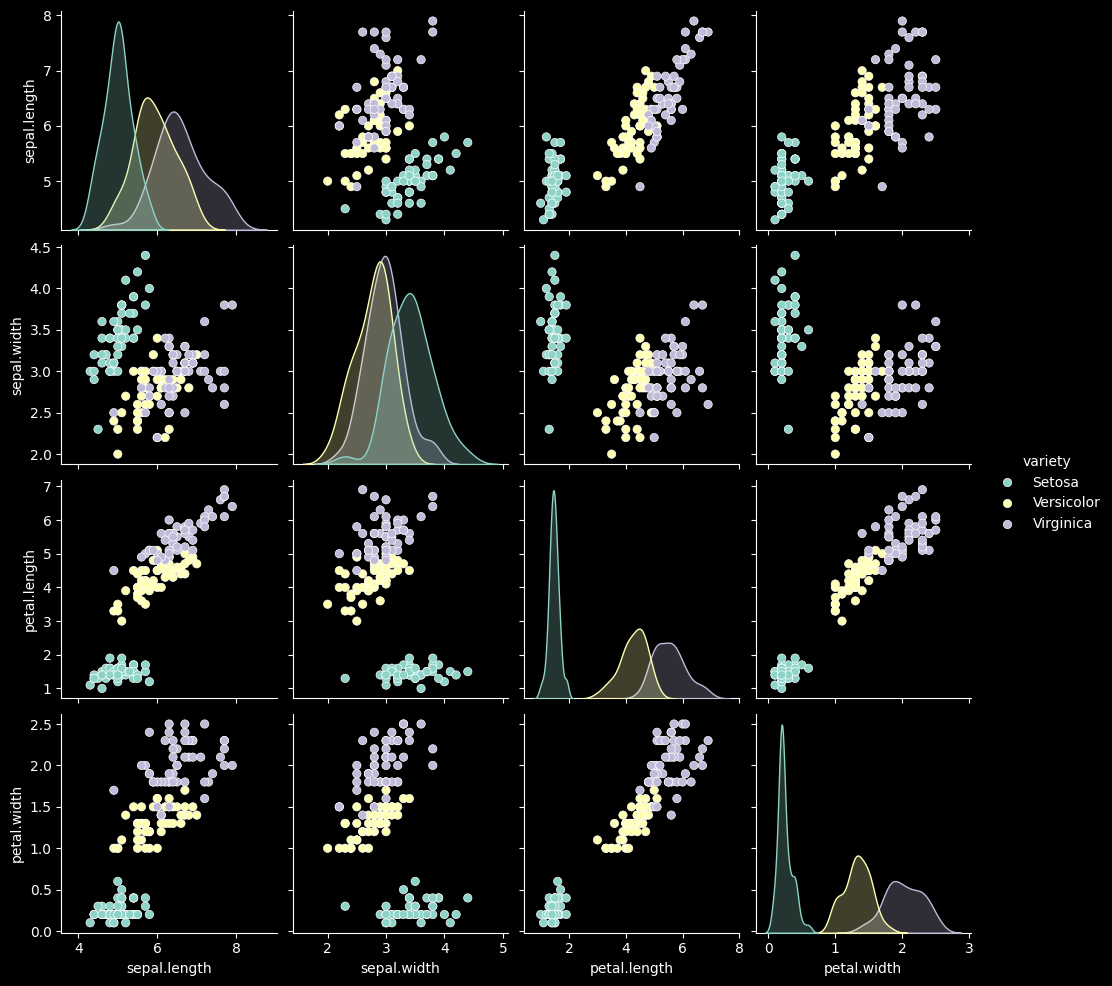

In [4]:
sns.pairplot(df, hue='variety')
plt.show()

### Средние значения признаков по видам

In [5]:
df.groupby('variety').mean()

sepal.length  sepal.width  petal.length  petal.width
variety                                                         
Setosa             5.006        3.428         1.462        0.246
Versicolor         5.936        2.770         4.260        1.326
Virginica          6.588        2.974         5.552        2.026

### Boxplot для Petal Length

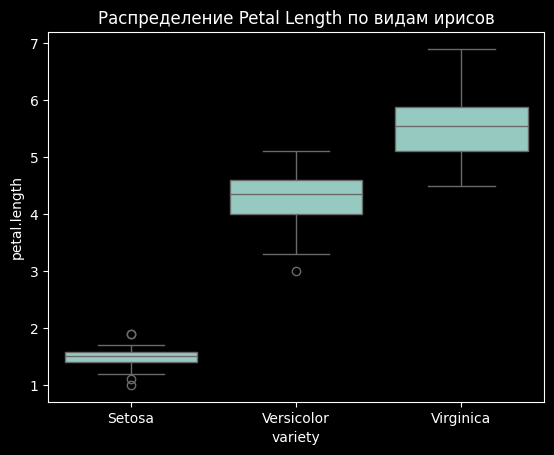

In [6]:
sns.boxplot(x='variety', y='petal.length', data=df)
plt.title('Распределение Petal Length по видам ирисов')
plt.show()

### Стандартизация числовых признаков

In [8]:
# Берём только числовые признаки
features = df.drop(columns=['variety'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['variety']=df['variety']

print("ДО стандартизации:")
print(features.describe())
print("\n" + "="*50 + "\n")

print("После стандартизации")
print(df_scaled.drop(columns=['variety']).describe())

ДО стандартизации:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


После стандартизации
       sepal.length   sepal.width  petal.length   petal.width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -7.815970e-16 -4.263256e-16 -4.736952e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00
50%   -5.250608e-02 -1.319795e-01  3.364776e-0